In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [2]:
iris =load_iris()
    #Creating an object called iris with the iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
    #Creating a data frame with the four feature variables

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
    #Adding a new column for the species name
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Creating Test and Train data
df['is_train']=np.random.uniform(0,1,len(df))<=.75
    #We are creating a random number between 0 and 1 for each row, if that number is less tan 0.75 will be true
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [5]:
#Creating dataframes with test rows and training rows
train,test = df[df['is_train']==True],df[df['is_train']==False]
    #If is_train is true will be part of the training data

print(f'Number of observations in the training data: {len(train)}')
print(f'Number of observations in the test data: {len(test)}')

Number of observations in the training data: 118
Number of observations in the test data: 32


In [6]:
#Create a list of the feature column's names
features = df.columns[:4]
    #Storing the first four columns
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
#Converting each species name into digits
y=pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
#Creating a random forest classifier
clf=RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=0)
    #n_estimators=The number of trees in the forest.
    #n_jobs means the nombre of jobs to run in parallel

#Training the classifier
clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
train[features].shape, y.shape

((118, 4), (118,))

In [96]:
#Applying the trained Classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [97]:
clf.predict_proba(test[features])[10:20]
    #Predict probability,those trhee columns mean three leaf notes at the end
    #for example the firt value means 1 for setosa, 0 for versicolor, 0 for virginica
        #of course, the sum of three values is equal to 1
        #in case two features have equal probability, it will choose the first

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [98]:
#mapping names for the plants for each predicted plant class
preds=iris.target_names[clf.predict(test[features])]
preds[10:20]

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [99]:
#Creating confusion matrix
pd.crosstab(test['species'],preds,rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [100]:
res=pd.DataFrame(clf.predict_proba(test[features]))
res['species']=preds
res.head(20)

,0,1,2,species
0,1.00,0.00,0.00,setosa
1,1.00,0.00,0.00,setosa
2,1.00,0.00,0.00,setosa
3,1.00,0.00,0.00,setosa
4,1.00,0.00,0.00,setosa
5,0.95,0.05,0.00,setosa
6,1.00,0.00,0.00,setosa
7,0.99,0.01,0.00,setosa
8,1.00,0.00,0.00,setosa
9,1.00,0.00,0.00,setosa


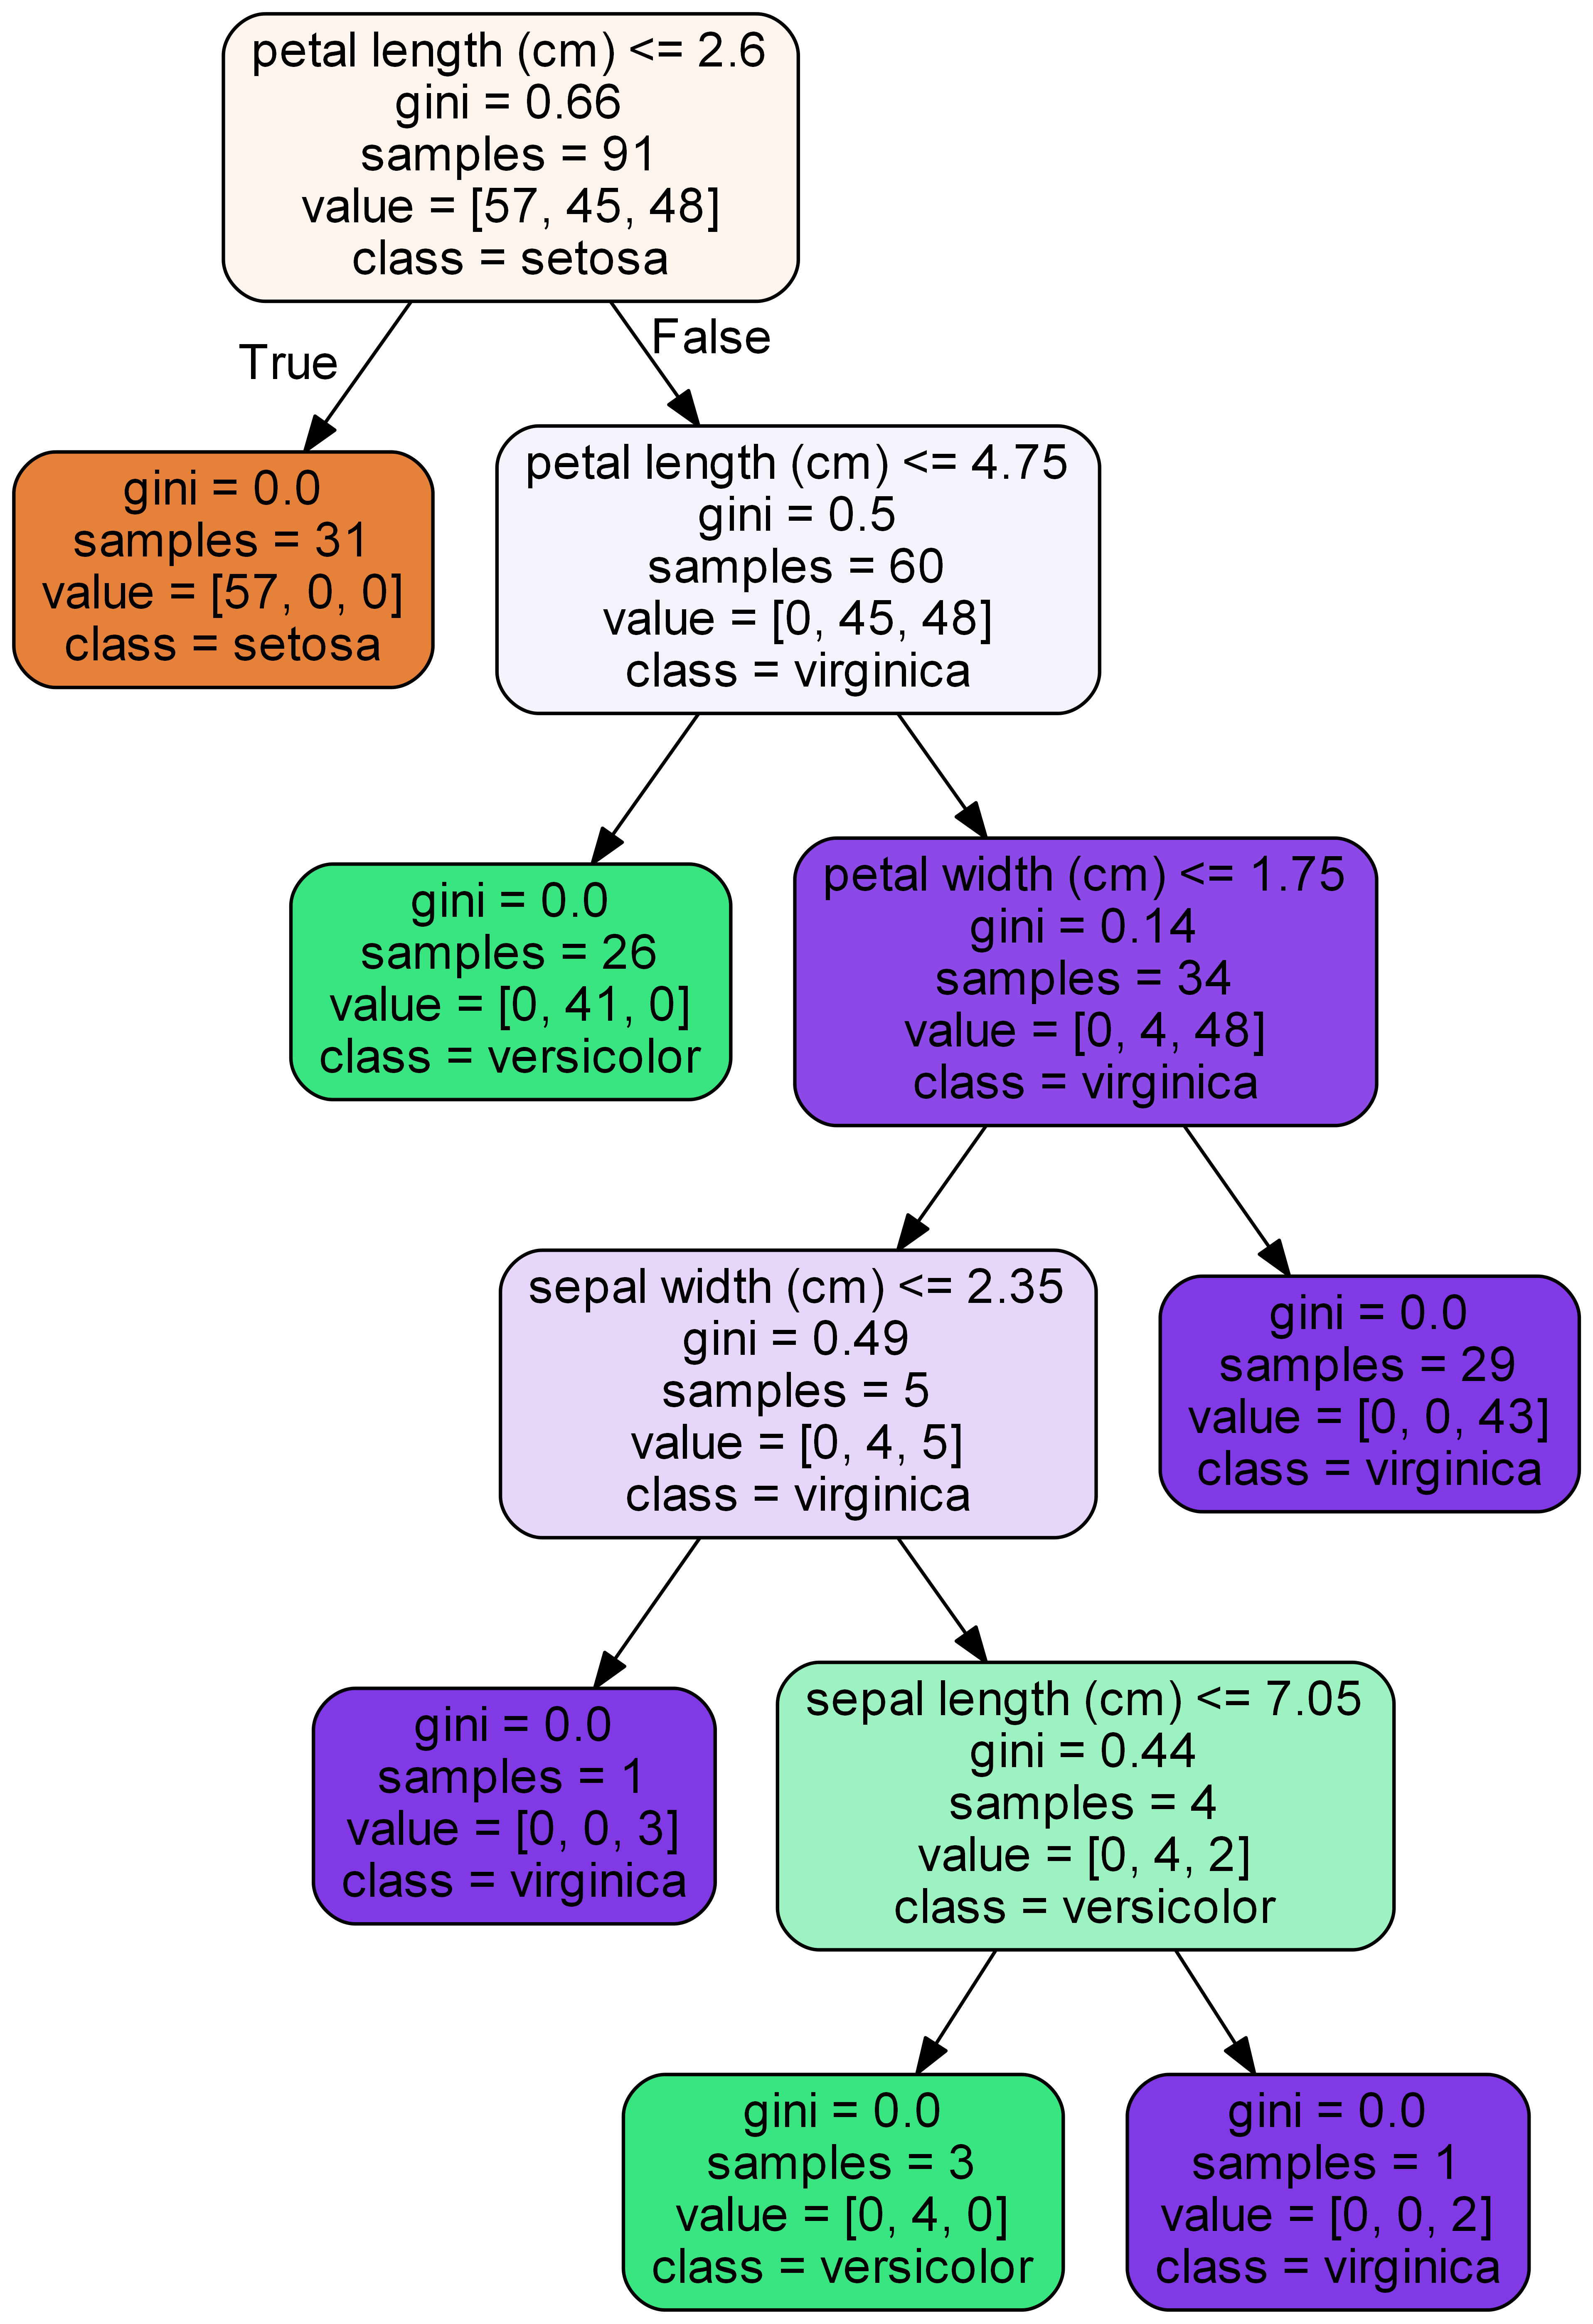

In [106]:
from sklearn.datasets import load_iris
from subprocess import call
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

iris = load_iris()

# Model (can also use single decision tree)

model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png')

In [ ]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')